In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Context:
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

## Data Fields Description

- **market_id**: 
  - Integer ID representing the market where the restaurant is located.
  
- **created_at**: 
  - Timestamp indicating when the order was placed.
  
- **actual_delivery_time**: 
  - Timestamp indicating when the order was delivered.
  
- **store_primary_category**: 
  - The category of the restaurant (e.g., fast food, fine dining, etc.).
  
- **order_protocol**: 
  - Integer code representing the order protocol, indicating how the order was placed (e.g., through a porter, direct call to restaurant, pre-booked, third-party service, etc.).
  
- **total_items_subtotal**: 
  - The final price of the order.
  
- **num_distinct_items**: 
  - The number of distinct items in the order.
  
- **min_item_price**: 
  - Price of the cheapest item in the order.
  
- **max_item_price**: 
  - Price of the costliest item in the order.
  
- **total_onshift_partners**: 
  - The number of delivery partners on duty at the time the order was placed.
  
- **total_busy_partners**: 
  - The number of delivery partners attending to other tasks at the time the order was placed.
  
- **total_outstanding_orders**: 
  - The total number of orders that need to be fulfilled at the time the order was placed.


In [82]:
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    pass

In [83]:
data = pd.read_csv("dataset.csv")

In [84]:
data.head(2)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0


In [85]:
# no duplicates
data.duplicated().sum()

0

In [86]:
data.shape

(197428, 14)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [88]:
# there are some missing values
data.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [89]:
data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

In [90]:
category_c = ['market_id','store_id','store_primary_category']
dates_c = ['created_at' ,'actual_delivery_time']
            
numbers_c =['num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders','total_items', 'subtotal']

EDA

In [91]:
for col in category_c:
    print(f'number of unique catgories `{col}` : {data[col].nunique()}')

number of unique catgories `market_id` : 6
number of unique catgories `store_id` : 6743
number of unique catgories `store_primary_category` : 74


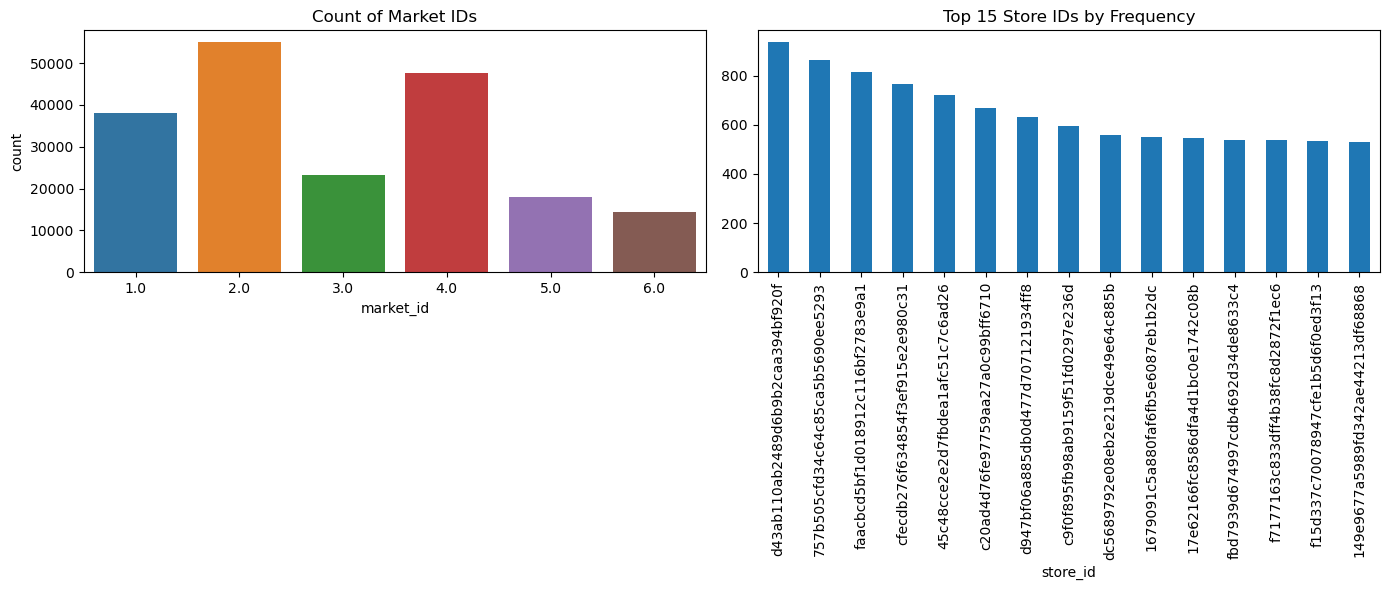

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data, x='market_id', ax=axes[0])
axes[0].set_title('Count of Market IDs')


store_ids_counts = data.groupby('store_id')['store_id'].count().sort_values(ascending=False)


store_ids_counts.head(15).plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 15 Store IDs by Frequency')


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top 15 store_primary_category  by Frequency')

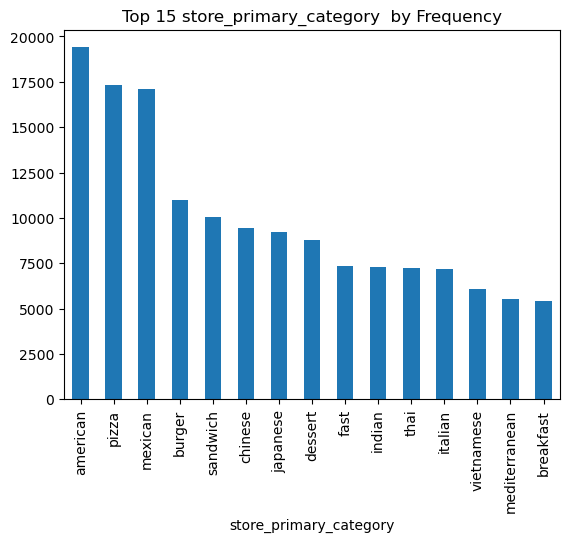

In [93]:

store_ids_counts = data.groupby('store_primary_category')['store_primary_category'].count().sort_values(ascending=False)


store_ids_counts.head(15).plot(kind='bar')
plt.title('Top 15 store_primary_category  by Frequency')

* market type 2 has most number of deleveris and 6 has least 
* american , pizza are most frequent categories 

In [94]:
store_ids_counts.quantile([0.09,0.25 , 0.5 , .75 , 0.8 , 0.95])

0.09       20.71
0.25       81.00
0.50      519.50
0.75     2728.00
0.80     4562.80
0.95    10374.30
Name: store_primary_category, dtype: float64

* 9 or less than 9% of store has just one delivery 
* 5 or less than 5% of store have more than 116 delivery
* median deliveries per store is 11 
* there are 6743 unique store ids 

* droping missing values

In [95]:
data.dropna(inplace=True)
data.shape

(176248, 14)

# Creating target 

In [96]:
data['created_at']=pd.to_datetime(data['created_at'])
data['actual_delivery_time']=pd.to_datetime(data['actual_delivery_time'])
data['delivery_time_in_minutes'] = (data['actual_delivery_time'] -data['created_at']).dt.total_seconds() / 60


min          1.683333
max       6231.316667
mean        47.764210
median      44.366667
Name: delivery_time_in_minutes, dtype: float64

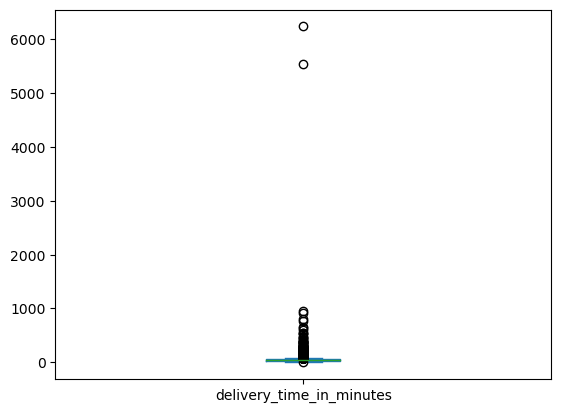

In [107]:
data['delivery_time_in_minutes'].plot(kind='box')
data['delivery_time_in_minutes'].agg(['min'  , 'max' ,'mean' ,'median'])

* minimum time to deliver was 1.68 mins max is 103 + hours
* median time is 47 mins and mean is 44 mins
* there are lot on extream values in delivery_time_in_minutes

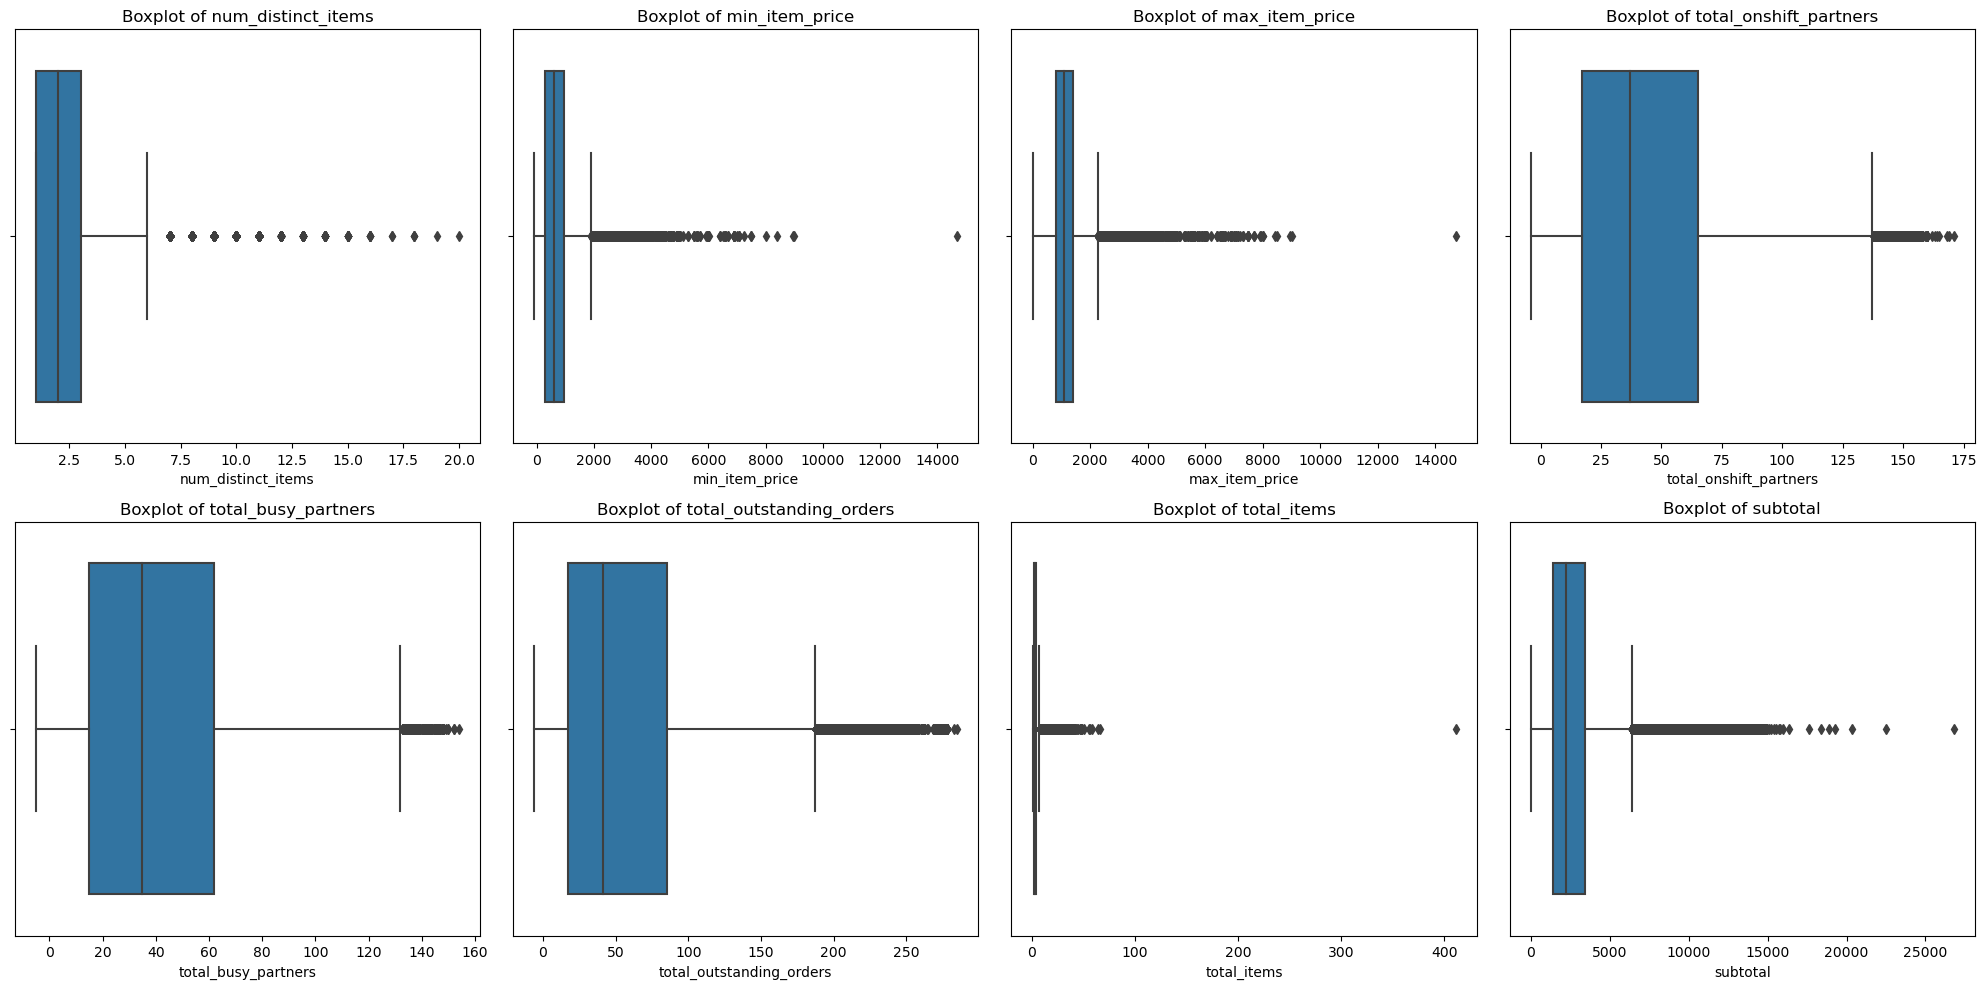

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(numbers_c) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))


axes = axes.flatten()


for i, feature in enumerate(numbers_c):
    # Plot boxplot
    sns.boxplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')



for i in range(len(numbers_c), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


In [99]:
for i, feature in enumerate(numbers_c):
    feature_stats = data[feature].describe(percentiles=[.25, .5, .75])
    print(f"Statistics for {feature}:")
    print(f"Min: {feature_stats['min']}")
    print(f"Max: {feature_stats['max']}")
    print(f"Mean: {feature_stats['mean']}")
    print(f"Median: {feature_stats['50%']}")
    print('-' * 50)

Statistics for num_distinct_items:
Min: 1.0
Max: 20.0
Mean: 2.674589215196768
Median: 2.0
--------------------------------------------------
Statistics for min_item_price:
Min: -86.0
Max: 14700.0
Mean: 684.9377297898416
Median: 595.0
--------------------------------------------------
Statistics for max_item_price:
Min: 0.0
Max: 14700.0
Mean: 1159.8869944623484
Median: 1095.0
--------------------------------------------------
Statistics for total_onshift_partners:
Min: -4.0
Max: 171.0
Mean: 44.905275520856975
Median: 37.0
--------------------------------------------------
Statistics for total_busy_partners:
Min: -5.0
Max: 154.0
Mean: 41.84543370704916
Median: 35.0
--------------------------------------------------
Statistics for total_outstanding_orders:
Min: -6.0
Max: 285.0
Mean: 58.206799509781675
Median: 41.0
--------------------------------------------------
Statistics for total_items:
Min: 1.0
Max: 411.0
Mean: 3.2045923925377875
Median: 3.0
-----------------------------------------

### some anomalies in data
* min_item_price  contains negative values 
* max_item_price has value as zero 
* total_onshift_partners has negative value  ``
* total_busy_partners contains negative value ``
* total_outstanding_orders contain negative values  ``
* subtotal is zero ||by defination subtotal  `final price of the order` can be zero


In [100]:


def outlier_treatment(column_name  , q =2.5):
    mu =data[column_name].mean()
    std =data[column_name].std()

    upper_std = mu +(q* std)
    lower_std = mu - (q* std)

    mask_u =data[column_name]>=upper_std

    data.loc[mask_u , column_name] =upper_std
    mask_l =data[column_name]<= 0
    
    print(column_name , upper_std , lower_std)
    data.loc[mask_l , column_name]    =1
    
    return data[column_name]


for col in numbers_c:
    data[col] =outlier_treatment(col)

num_distinct_items 6.738483351642369 -1.3893049212488329
min_item_price 1984.7162927261527 -614.8408331464695
max_item_price 2561.84826918368 -242.07428025898298
total_onshift_partners 131.2287596680753 -41.41820862636135
total_busy_partners 122.2318663187919 -38.54099890469359
total_outstanding_orders 189.97766003550976 -73.56406101594642
total_items 9.889340174782097 -3.4801553897065225
subtotal 7268.805398041197 -1875.807520051092


In [102]:
for col in numbers_c:
    
    print(col ,data[col].agg(['min' ,'max' ,'mean' ,'median' ,'std']))

num_distinct_items min       1.000000
max       6.738483
mean      2.635269
median    2.000000
std       1.484216
Name: num_distinct_items, dtype: float64
min_item_price min          1.000000
max       1984.716293
mean       669.351694
median     595.000000
std        451.102654
Name: min_item_price, dtype: float64
max_item_price min          1.000000
max       2561.848269
mean      1142.603869
median    1095.000000
std        486.728207
Name: max_item_price, dtype: float64
total_onshift_partners min         1.000000
max       131.228760
mean       44.787840
median     37.000000
std        34.126192
Name: total_onshift_partners, dtype: float64
total_busy_partners min         1.000000
max       122.231866
mean       41.758560
median     35.000000
std        31.825884
Name: total_busy_partners, dtype: float64
total_outstanding_orders min         1.000000
max       189.977660
mean       57.644187
median     41.000000
std        50.952133
Name: total_outstanding_orders, dtype: float64
tota

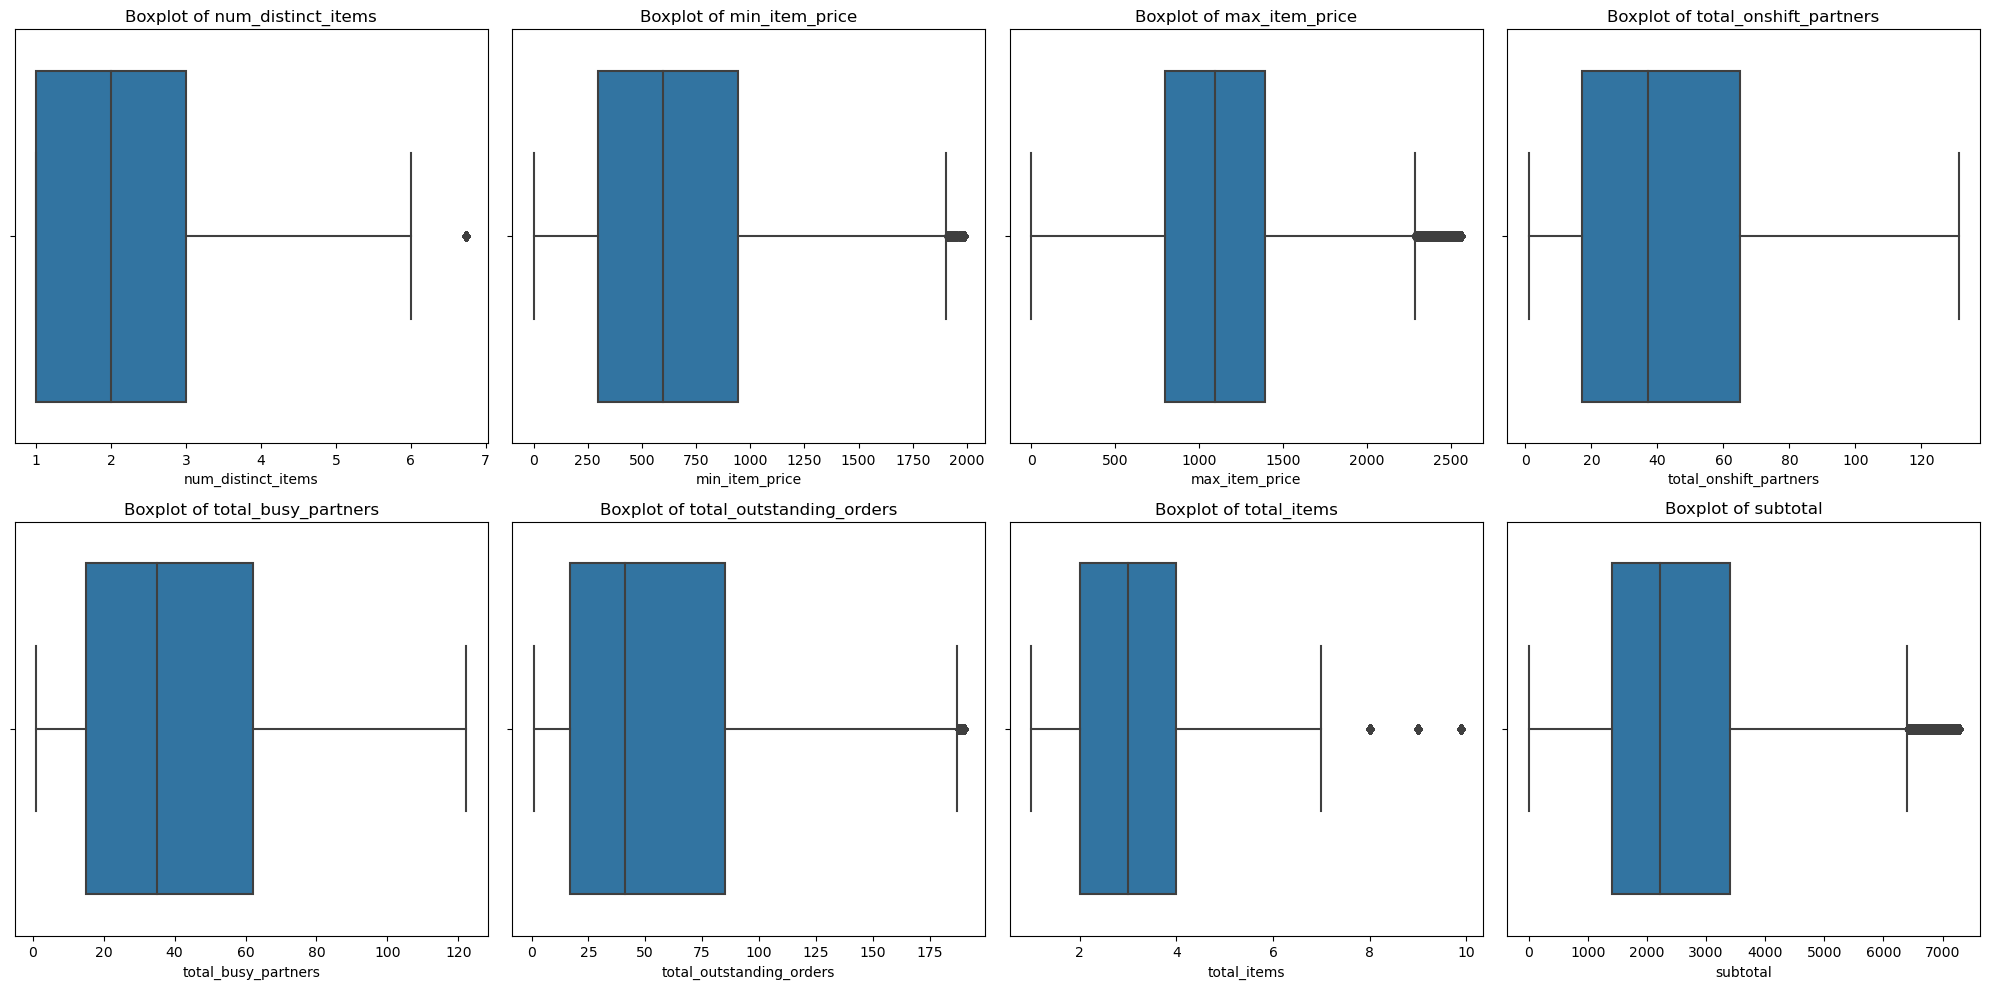

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(numbers_c) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))


axes = axes.flatten()


for i, feature in enumerate(numbers_c):
    # Plot boxplot
    sns.boxplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')



for i in range(len(numbers_c), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()


In [109]:
category_c

['market_id', 'store_id', 'store_primary_category']

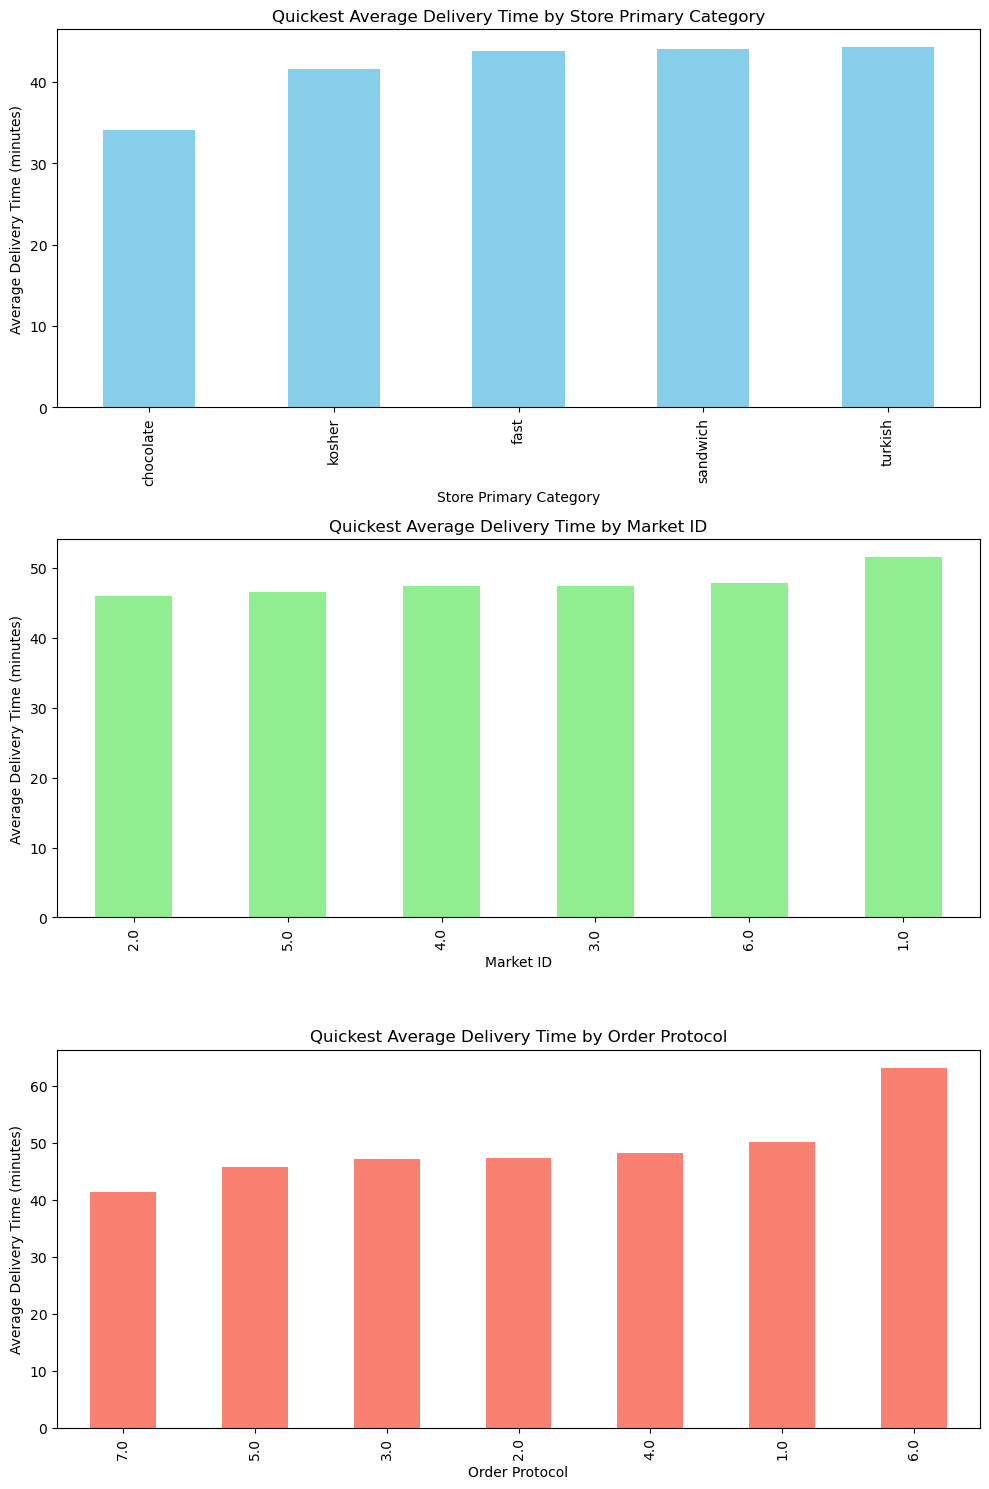

In [123]:
import matplotlib.pyplot as plt


store_category_avg = data.groupby('store_primary_category')['delivery_time_in_minutes'].mean().sort_values(ascending=True).head(5)


market_avg = data.groupby('market_id')['delivery_time_in_minutes'].mean().sort_values(ascending=True)


order_protocol_avg = data.groupby('order_protocol')['delivery_time_in_minutes'].mean().sort_values(ascending=True)


fig, axes = plt.subplots(3, 1, figsize=(10, 15))


store_category_avg.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Quickest Average Delivery Time by Store Primary Category')
axes[0].set_ylabel('Average Delivery Time (minutes)')
axes[0].set_xlabel('Store Primary Category')


market_avg.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Quickest Average Delivery Time by Market ID')
axes[1].set_ylabel('Average Delivery Time (minutes)')
axes[1].set_xlabel('Market ID')


order_protocol_avg.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Quickest Average Delivery Time by Order Protocol')
axes[2].set_ylabel('Average Delivery Time (minutes)')
axes[2].set_xlabel('Order Protocol')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* Chocolate primary category take least avg delivery time 
* market id 2 take least avg delivery time 
* Order protocal 7 take least avg delivery time 

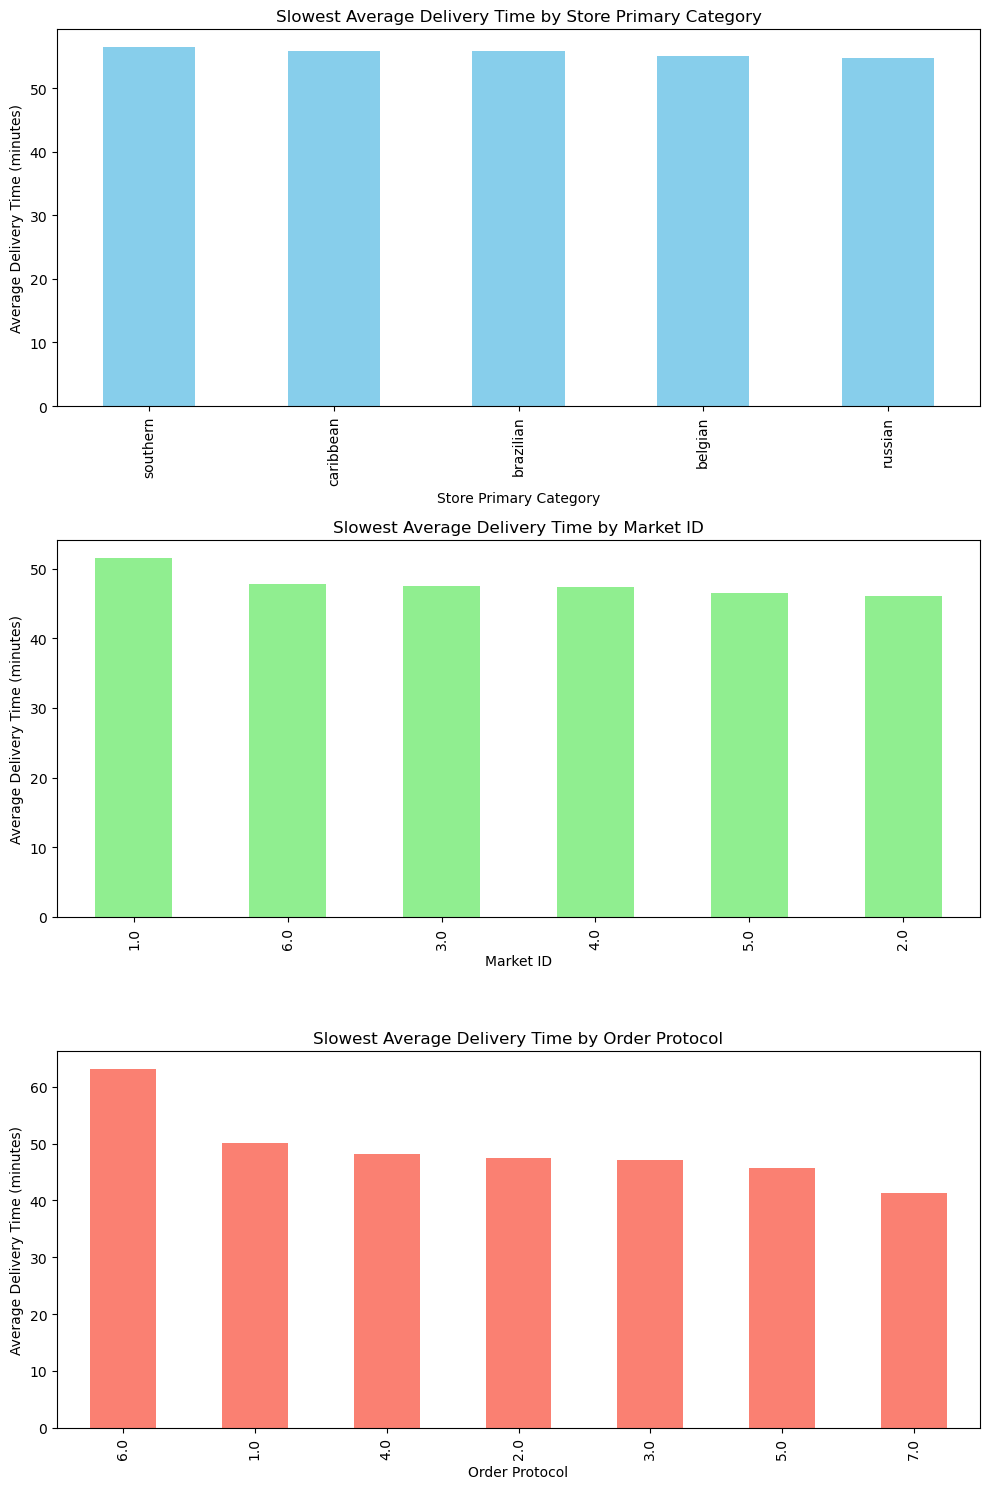

In [124]:
import matplotlib.pyplot as plt


store_category_avg = data.groupby('store_primary_category')['delivery_time_in_minutes'].mean().sort_values(ascending=False).head(5)


market_avg = data.groupby('market_id')['delivery_time_in_minutes'].mean().sort_values(ascending=False)


order_protocol_avg = data.groupby('order_protocol')['delivery_time_in_minutes'].mean().sort_values(ascending=False)


fig, axes = plt.subplots(3, 1, figsize=(10, 15))


store_category_avg.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Slowest Average Delivery Time by Store Primary Category')
axes[0].set_ylabel('Average Delivery Time (minutes)')
axes[0].set_xlabel('Store Primary Category')


market_avg.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Slowest Average Delivery Time by Market ID')
axes[1].set_ylabel('Average Delivery Time (minutes)')
axes[1].set_xlabel('Market ID')


order_protocol_avg.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Slowest Average Delivery Time by Order Protocol')
axes[2].set_ylabel('Average Delivery Time (minutes)')
axes[2].set_xlabel('Order Protocol')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* southern primary category take highest avg delivery time 
* market id 1 take highest avg delivery time 
* Order protocal 6  take highest avg delivery time 

# date wise feature 

In [127]:

data['created_at_day_of_week'] = data['created_at'].dt.day_name()
data['created_at_hour_of_day'] = data['created_at'].dt.hour
data['created_at_day_of_month'] = data['created_at'].dt.day
data['created_at_month'] = data['created_at'].dt.monthr



data.drop(columns=['created_at'	,'actual_delivery_time'	])

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_in_minutes,created_at_day_of_week,created_at_hour_of_day,created_at_day_of_month,created_at_month,created_at_quarter
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,62.983333,Friday,22,6,2,1
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,67.066667,Tuesday,21,10,2,1
8,2.0,f0ade77b43923b38237db569b016ba25,indian,3.0,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,26.433333,Monday,0,16,2,1
14,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,37.883333,Thursday,3,12,2,1
15,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,49.800000,Tuesday,2,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3.0,1389.0,3.0,345.0,649.0,17.0,17.0,23.0,65.116667,Tuesday,0,17,2,1
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6.0,3010.0,4.0,405.0,825.0,12.0,11.0,14.0,56.383333,Friday,0,13,2,1
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5.0,1836.0,3.0,300.0,399.0,39.0,41.0,40.0,50.133333,Saturday,4,24,1,1
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1.0,1175.0,1.0,535.0,535.0,7.0,7.0,12.0,65.116667,Sunday,18,1,2,1


created_at_day_of_week
Saturday     30858
Sunday       29898
Friday       25012
Monday       24202
Thursday     22997
Wednesday    21796
Tuesday      21485
Name: count, dtype: int64

created_at_hour_of_day
2     32940
1     25734
3     23719
20    14014
4     13254
19    12214
0     11466
21    10274
22     7877
23     7338
5      6079
18     4546
17     3071
16     1945
6      1223
15      504
14       39
7         9
8         2
Name: count, dtype: int64

<Axes: xlabel='created_at_month', ylabel='created_at_day_of_week'>

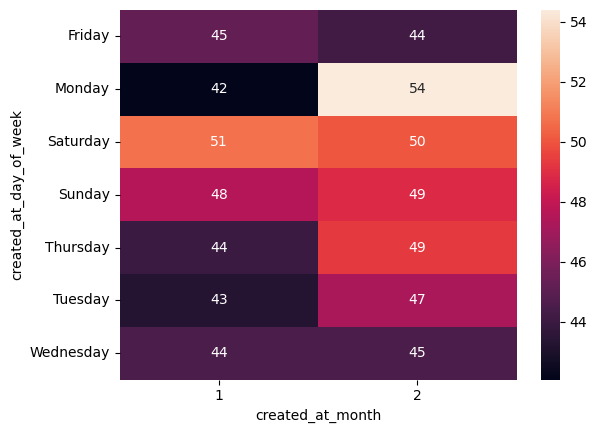

In [139]:

display(data['created_at_day_of_week'].value_counts())
display(data['created_at_hour_of_day'].value_counts())
pivot = pd.pivot_table(data , values='delivery_time_in_minutes' , index='created_at_day_of_week' , columns='created_at_month')

sns.heatmap(pivot  , annot=True)

* night time most of the request is created, morning and evening very few
* Friday saturday and sunday most of the request is created 
* highest avg ttd is for monday and months 2 
* Request created on saturday take most amount of to deliver 

In [132]:
data['created_at_month'].value_counts()

created_at_month
2    113960
1     62288
Name: count, dtype: int64

In [ ]:
sns.heatmap(data , )

# Feature engineering 

In [ ]:

data['subtotal_num_distinct_items_ratio'] =data['subtotal']/data['num_distinct_items']
data['price_range'] = data['max_item_price'] / data['min_item_price']
data['order_density'] = data['total_items'] / data['total_outstanding_orders']
data['distinct_item_ratio'] = data['num_distinct_items'] / data['total_items']
data['average_item_price'] = data['subtotal'] / data['total_items']
data['busy_partner_ratio'] = data['total_busy_partners'] / data['total_onshift_partners']
data['item_price_per_partner'] = data['subtotal'] / data['total_onshift_partners']
data['orders_per_distinct_item'] = data['total_items'] / data['num_distinct_items']
data['item_partner_load'] = data['total_items'] / data['total_onshift_partners']
data['log_subtotal'] = np.log(data['subtotal'] + 1)
data['log_total_items'] = np.log(data['total_items'] + 1)
data['log_total_outstanding_orders'] = np.log(data['total_outstanding_orders'] + 1)

In [ ]:
fef =['subtotal_num_distinct_items_ratio',
    
    'price_range',
    'order_density',
    'distinct_item_ratio',

    'average_item_price',

    'busy_partner_ratio',
    'item_price_per_partner',
    'orders_per_distinct_item',
    'item_partner_load',
    'log_subtotal',
    'log_total_items',
    'log_total_outstanding_orders',
]

In [ ]:
data.drop(columns=['created_at', 'actual_delivery_time'] , inplace =True)

In [ ]:

# target encode 
category_c =['market_id', 'store_id','store_primary_category', 'order_protocol',  'created_at_day_of_week', 'created_at_hour_of_day',
       'created_at_day_of_month', 'created_at_month', 'created_at_quarter']

# standardize
numbers_c = numbers_c+fef
       
target ='delivery_time_in_minutes'




###  droping row where traget values is greater than 3 std 
### droping extreame values 

In [ ]:
mu =data[target].mean()
std =data[target].std()

three_z = mu +3 *std
index = data[data[target]> three_z].index

data.drop( index = index , inplace=True)

In [ ]:
for col in category_c:
    data[col] =data[col].astype('category')

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# train test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,TargetEncoder,OneHotEncoder
 
 from sklearn.model_selection import train_test_split


In [ ]:
X = data.drop(columns=target)
y = data[target]

# train test val split

In [ ]:
# First split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 1)

# Now split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# data pipeline

In [ ]:
ct = ColumnTransformer(
    transformers=[

        # ('target_encoder', OneHotEncoder(handle_unknown='ignore' ,sparse_output=False), category_c),
        
        ('target_encoder',TargetEncoder(), category_c),
        ('scaler', StandardScaler(), numbers_c)
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', ct)
])


X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_val_transformed =pipeline.transform(X_val)

X_test_transformed =pipeline.transform(X_test)





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam


import os

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from tensorflow.keras import regularizers
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau

import random

In [ ]:
# Set the seed for all relevant libraries
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Model training 

In [ ]:


model = tf.keras.Sequential([
    layers.Input(shape=(X_train_transformed.shape[1],)),
    layers.Dense(96, kernel_regularizer=regularizers.l2(0.002)),  # Adjust L2 regularization
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.6),  # Adjust dropout rate
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.002)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.6),
    layers.Dense(48, kernel_regularizer=regularizers.l2(0.002)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.6),  # Adjust dropout rate
    layers.Dense(48, kernel_regularizer=regularizers.l2(0.002)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1)
])

# Set up the TensorBoard callback
log_dir = "logs/fit"  # Directory to store logs
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  
    restore_best_weights=True
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,  
    min_lr=1e-6
)

# Use Adam optimizer
optim = Adam(learning_rate=0.001)
model.compile(optimizer=optim, loss='huber', metrics=['mean_absolute_percentage_error'])

# Fit the model with the TensorBoard callback
history = model.fit(
    X_train_transformed,
    y_train,
    validation_data=(X_val_transformed, y_val),
    epochs=200,  # Increase number of epochs
    batch_size=256,  # Adjust batch size
    callbacks=[tensorboard_callback, reduce_lr, early_stopping]
)


Epoch 1/200
412/412 [==============================] - 3s 4ms/step - loss: 45.5019 - mean_absolute_percentage_error: 96.0499 - val_loss: 42.3696 - val_mean_absolute_percentage_error: 88.4090 - lr: 0.0010
Epoch 2/200
412/412 [==============================] - 1s 3ms/step - loss: 38.4510 - mean_absolute_percentage_error: 78.8653 - val_loss: 31.7065 - val_mean_absolute_percentage_error: 63.3258 - lr: 0.0010
Epoch 3/200
412/412 [==============================] - 1s 3ms/step - loss: 25.4008 - mean_absolute_percentage_error: 48.9809 - val_loss: 14.8660 - val_mean_absolute_percentage_error: 28.2399 - lr: 0.0010
Epoch 4/200
412/412 [==============================] - 1s 3ms/step - loss: 13.8988 - mean_absolute_percentage_error: 27.9169 - val_loss: 12.1200 - val_mean_absolute_percentage_error: 30.8193 - lr: 0.0010
Epoch 5/200
412/412 [==============================] - 2s 4ms/step - loss: 11.4458 - mean_absolute_percentage_error: 25.4722 - val_loss: 11.6204 - val_mean_absolute_percentage_error: 2

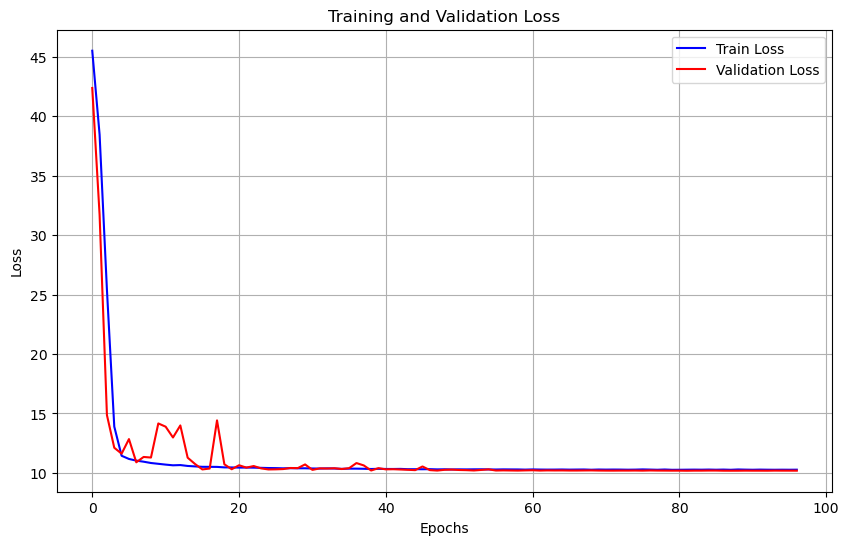

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:


# Make predictions on the training set
y_train_pred = model.predict(X_train_transformed)

# Make predictions on the test set
y_test_pred = model.predict(X_test_transformed)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_transformed)

# Calculate MAPE and MSE on the training set
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate MAPE and MSE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate MAPE and MSE on the validation set
val_mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test MSE: {test_mse:.2f}")
print(f"Validation MAPE: {val_mape:.2f}%")
print(f"Validation MSE: {val_mse:.2f}")

824/824 [==============================] - 0s 496us/step
Training MAPE: 23.22%
Training MSE: 208.76
Test MAPE: 23.12%
Test MSE: 212.75
Validation MAPE: 23.17%
Validation MSE: 210.99


# Tuning model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.optimizers.legacy  import Adam,RMSprop
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [ ]:



space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(1e-2)),
    'l2_reg': hp.loguniform('l2_reg', np.log(1e-5), np.log(1e-2)),
    'dropout_rate': hp.uniform('dropout_rate', 0.2, 0.6),
    'batch_size': hp.choice('batch_size', [64, 128, 256, 512]),
    'optimizer': hp.choice('optimizer', ['adam', 'rmsprop'])
}


def objective(params):
    # Create the model
    model = tf.keras.Sequential([
        layers.Input(shape=(X_train_transformed.shape[1],)),
        layers.Dense(96, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(64, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(48, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(48, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(32, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(16, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(1)
    ])

    # Set up the optimizer
    if params['optimizer'] == 'adam':
        optim = Adam(learning_rate=params['learning_rate'])
    else:
        optim = RMSprop(learning_rate=params['learning_rate'])

    # Compile the model
    model.compile(optimizer=optim, loss='huber', metrics=['mean_absolute_percentage_error'])

    # Set up the callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Fit the model
    history = model.fit(
        X_train_transformed,
        y_train,
        validation_data=(X_val_transformed, y_val),
        epochs=200,
        batch_size=params['batch_size'],
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    loss  , mape=model.evaluate(X_val_transformed, y_val)




    # Return the loss and status
    return {'loss': loss, 'status': STATUS_OK}

# Run the hyperparameter optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=15, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters:", best)


824/824 [==============================] - 0s 540us/step - loss: 10.9631 - mean_absolute_percentage_error: 25.7457

824/824 [==============================] - 0s 577us/step - loss: 10.8746 - mean_absolute_percentage_error: 25.2546

824/824 [==============================] - 0s 573us/step - loss: 10.9001 - mean_absolute_percentage_error: 25.5762

824/824 [==============================] - 0s 409us/step - loss: 10.0494 - mean_absolute_percentage_error: 23.3520

824/824 [==============================] - 0s 422us/step - loss: 10.1232 - mean_absolute_percentage_error: 23.4028

824/824 [==============================] - 0s 438us/step - loss: 10.2377 - mean_absolute_percentage_error: 23.7240

824/824 [==============================] - 0s 420us/step - loss: 10.3091 - mean_absolute_percentage_error: 23.5732

824/824 [==============================] - 0s 424us/step - loss: 10.1932 - mean_absolute_percentage_error: 23.3694

824/824 [==============================] - 0s 416us/step - loss: 10.0666

In [ ]:
best 


{'batch_size': 0,
 'dropout_rate': 0.22500761353444074,
 'l2_reg': 0.0002961576602613677,
 'learning_rate': 0.0015188747990346094,
 'optimizer': 1}

# best hyperparam

In [ ]:
best={'batch_size': 0,
 'dropout_rate': 0.22500761353444074,
 'l2_reg': 0.0002961576602613677,
 'learning_rate': 0.0015188747990346094,
 'optimizer': 1}

In [ ]:

# Map the optimizer index to the optimizer name
optimizer_choices = ['adam', 'rmsprop']
best_optimizer = optimizer_choices[best['optimizer']]
batch_choices =[64, 128, 256, 512]
best_batch_size =batch_choices[best['batch_size']]

In [ ]:
best['optimizer'] =best_optimizer
best['batch_size'] =best_batch_size

In [ ]:
def train_model(params):
    model = tf.keras.Sequential([
        layers.Input(shape=(X_train_transformed.shape[1],)),
        layers.Dense(96, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(64, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(48, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(48, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(32, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(16, kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(1)
    ])

    # Set up the optimizer
    if params['optimizer'] == 'adam':
        optim = Adam(learning_rate=params['learning_rate'])
    else:
        optim = RMSprop(learning_rate=params['learning_rate'])

    # Compile the model
    model.compile(optimizer=optim, loss='huber', metrics=['mean_absolute_percentage_error'])

    # Set up the callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Fit the model
    history = model.fit(
        X_train_transformed,
        y_train,
        validation_data=(X_val_transformed, y_val),
        epochs=200,
        batch_size=params['batch_size'],
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    return history , model 


In [ ]:
history , model   =train_model(best)

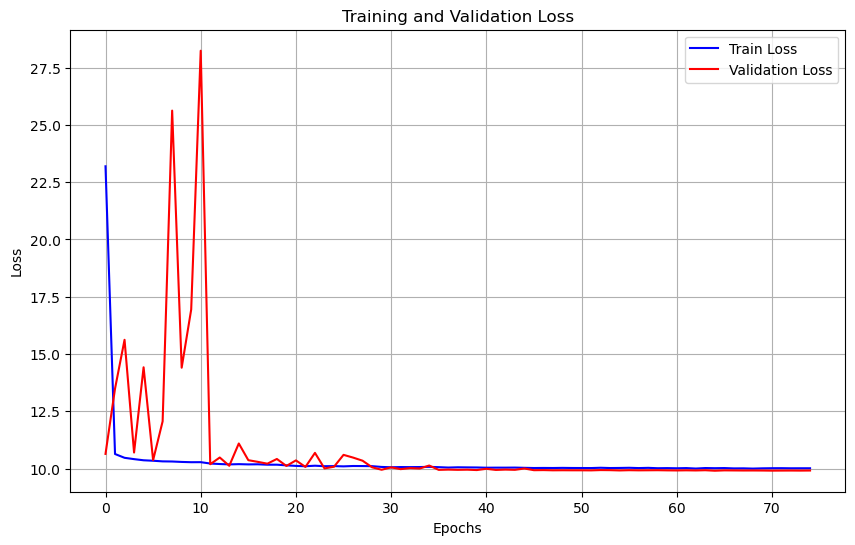

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Make predictions on the training set
y_train_pred = model.predict(X_train_transformed)

# Make predictions on the test set
y_test_pred = model.predict(X_test_transformed)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_transformed)

# Calculate MAPE and MSE on the training set
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate MAPE and MSE on the test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate MAPE and MSE on the validation set
val_mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Training MAPE: {train_mape:.2f}%")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test MSE: {test_mse:.2f}")
print(f"Validation MAPE: {val_mape:.2f}%")

print(f"Validation MSE: {val_mse:.2f}")

824/824 [==============================] - 0s 373us/step
Training MAPE: 22.72%
Training MSE: 193.83
Test MAPE: 22.80%
Test MSE: 198.74
Validation MAPE: 22.86%
Validation MSE: 197.09


# Model Performance Comparison

## Base Model

- **Training MAPE**: 23.22%
- **Training MSE**: 208.76
- **Test MAPE**: 23.12%
- **Test MSE**: 212.75
- **Validation MAPE**: 23.17%
- **Validation MSE**: 210.99

## Tuned Model

- **Training MAPE**: 22.72%
- **Training MSE**: 193.83
- **Test MAPE**: 22.80%
- **Test MSE**: 198.74
- **Validation MAPE**: 22.86%
- **Validation MSE**: 197.09

## Summary of Improvements:

- **Training MAPE**: Improved by 0.50% (lower MAPE indicates better performance).
- **Training MSE**: Reduced by 14.93 (lower MSE indicates better performance).
- **Test MAPE**: Improved by 0.32% in the tuned model.
- **Test MSE**: Reduced by 14.01.
- **Validation MAPE**: Improved by 0.31% in the tuned model.
- **Validation MSE**: Reduced by 13.90.

### Conclusion:
The tuned model shows improvements across all evaluation metrics, particularly in reducing both MAPE and MSE for training, testing, and validation data. This indicates better generalization and predictive performance after the tuning process.
